### 1. 일반 Sin 함수

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

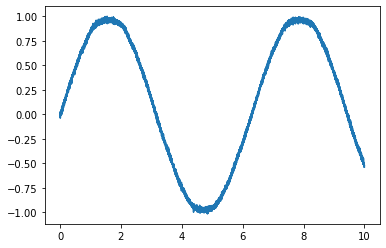

In [11]:
import nengo
import numpy as np
import matplotlib.pyplot as plt

# 전체 Network 구성 
# Node, Ensemble ()
# Connection (Node + Ensemble 합침)
# Connection (Ensemble + Ensemble 도 됨)
with nengo.Network() as net:
    sin_input = nengo.Node(output=np.sin) # 100 개의 뉴런이 sin wave 형태를 띔
    
    # A population of 100 neurons representing a sine wave
    sin_ens = nengo.Ensemble(n_neurons=100, dimensions=1)    
    nengo.Connection(sin_input, sin_ens) # 

    # View the decoded output of sin_squared
    sin_probe = nengo.Probe(sin_ens, synapse=0.01)

# python, Numpy 기반의 Simulator
with nengo.Simulator(net) as sim:
    sim.run(10.0)
plt.plot(sim.trange(), sim.data[sin_probe])

### 2. SIn 함수 제곱한 것

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

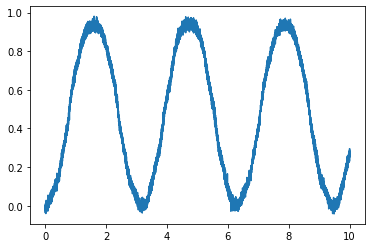

In [8]:
import nengo
import numpy as np
import matplotlib.pyplot as plt

# 전체 Network 구성 
# Node, Ensemble
# Connection (Node + Ensemble 합침)
# Connection (Ensemble + Ensemble 도 됨)

with nengo.Network() as net:
    sin_input = nengo.Node(output=np.sin) # 100 개의 뉴런이 sin wave 형태를 띔
    
    # A population of 100 neurons representing a sine wave
    sin_ens = nengo.Ensemble(n_neurons=100, dimensions=1)
    
    nengo.Connection(sin_input, sin_ens)
    
    # A population of 100 neurons representing the square of the sine wave
    sin_squared = nengo.Ensemble(n_neurons=100, dimensions=1) 
    nengo.Connection(sin_ens, sin_squared, function=np.square) # 제곱
    
    # View the decoded output of sin_squared
    squared_probe = nengo.Probe(sin_squared, synapse=0.01)

# python, Numpy 기반의 Simulator
with nengo.Simulator(net) as sim:
    sim.run(10.0)
plt.plot(sim.trange(), sim.data[squared_probe])

### 3. Nengo Object 파악
- Node : 하나의 현상 (신호)
- Ensemble : 그 현상에 대한 자연적인 퍼짐?
- Connection : Node와 Ensemble을 엮음
- Probe : 값을 살펴보기 위한 object

### 4. 실행 
- nengo.Simulator -> run(5.0) : 5초동안 실행하라는 것

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

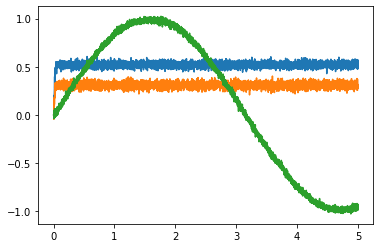

In [27]:
with nengo.Network() as net:
    # node 선언
    sin_node = nengo.Node(np.sin)
    basic_node = nengo.Node(output=0.5)
    basic_node2 = nengo.Node(output=0.3)
    
    # ensemble 각각 = (데이터 뿔리기)
    my_ensemble = nengo.Ensemble(n_neurons=80, dimensions=1)
    two_d_ensemble = nengo.Ensemble(n_neurons=80, dimensions=2)
    
    # Connection 
    # sin_node => my_ensemble에
    # basic_node, basic_node2 => two_d_ensemble 에
    nengo.Connection(sin_node, my_ensemble)
    nengo.Connection(basic_node, two_d_ensemble[0])
    nengo.Connection(basic_node2, two_d_ensemble[1])
    
    # View the decoded output of sin_squared    
    one_d_probe = nengo.Probe(my_ensemble, synapse=0.01)
    two_d_probe = nengo.Probe(two_d_ensemble, synapse=0.01)

# python, Numpy 기반의 Simulator
# plt 란 plot 에 다같이 그리는 것임.
with nengo.Simulator(net) as sim:
    sim.run(5.0)
plt.plot(sim.trange(), sim.data[two_d_probe]) # 파랑주황
plt.plot(sim.trange(), sim.data[one_d_probe]) # 초록